<a href="https://colab.research.google.com/github/RogerHeederer/ML_practice_MyFirstML_B/blob/master/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

source reference : https://github.com/wikibook/machine-learning/tree/2.0

**위 레퍼런스를 참조하여 공부하였으며, 필요하다고 생각되는 부분에 추가적인 설명 ,코드 추가, 그림 삽입 등을 덧붙였습니다..**


In [41]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  %tensorflow_version 2.x
except Exception:
  pass

In [42]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from IPython.display import Image

tf.random.set_seed(1)
np.random.seed(1)


##오토인코더 - 입력값을 압축시킨 후, 압축된 정보를 다시 복원하여 원래 값을 출력하는 비지도 학습 딥러닝 모델

학습과정을 통해 출력값이 최대한 원래 입력값과 일치하도록 파라미터를 최적화 시켜준다.

입력 -> 압축 -> 압축풀기 -> 출력값

압축 과정에서 노이즈가 제거된 핵심 특징들로 구성된 저차원 데이터로 만든다.

차원 축소의 목적으로 오토인코더가 많이 사용된다

In [43]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [44]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [45]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [46]:
x_train = x_train.reshape(60000, 784)

#테스트 데이터는 10000개 중에 300개 따로 추출
x_test = x_test[:300]
y_test = y_test[:300]
x_test = x_test.reshape(300, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#normalize data
gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

In [47]:
Image(url= "https://raw.githubusercontent.com/captainchargers/deeplearning/master/img/autoencoder2.png", width=500, height=250)

In [48]:
# 모델 구성
encoding_dim = 3
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

In [49]:
autoencoder.summary()

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 2355      
_________________________________________________________________
dense_3 (Dense)              (None, 784)               3136      
Total params: 5,491
Trainable params: 5,491
Non-trainable params: 0
_________________________________________________________________


In [50]:
#인코더 모델 따로 선언(밑에 시각화 섹션에서 인코딩/디코딩 과정을 따로 표현하기 위해 )
encoder = Model(input_img, encoded) #3차원으로 압축된 값을 받기 위해 인코더 모델을 따로 생성
encoder.summary()

Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 2355      
Total params: 2,355
Trainable params: 2,355
Non-trainable params: 0
_________________________________________________________________


In [51]:
#디코더 모델 따로 선언(밑에 시각화 섹션에서 인코딩/디코딩 과정을 따로 표현하기 위해 )
encoded_input = Input(shape=(encoding_dim,)) # 디코더의 입력값을 지정
decoder_layer = autoencoder.layers[-1] # 디코더 레이어는 오토인코더의 마지막 레이어
decoder = Model(encoded_input, decoder_layer(encoded_input))
decoder.summary()

Model: "functional_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense_3 (Dense)              (None, 784)               3136      
Total params: 3,136
Trainable params: 3,136
Non-trainable params: 0
_________________________________________________________________


In [52]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [63]:
autoencoder.fit(x_train, x_train, #x_train을 인코딩 -> 디코딩 후 정답이 x_train 그대로 나와야함
                epochs=60,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/60
469/469 [==============================] - 3s 6ms/step - loss: 0.2121 - val_loss: 0.2043
Epoch 2/60
469/469 [==============================] - 3s 6ms/step - loss: 0.2119 - val_loss: 0.2040
Epoch 3/60
469/469 [==============================] - 3s 6ms/step - loss: 0.2117 - val_loss: 0.2039
Epoch 4/60
469/469 [==============================] - 3s 6ms/step - loss: 0.2115 - val_loss: 0.2040
Epoch 5/60
469/469 [==============================] - 3s 7ms/step - loss: 0.2114 - val_loss: 0.2037
Epoch 6/60
469/469 [==============================] - 3s 6ms/step - loss: 0.2113 - val_loss: 0.2037
Epoch 7/60
469/469 [==============================] - 3s 6ms/step - loss: 0.2112 - val_loss: 0.2037
Epoch 8/60
469/469 [==============================] - 3s 6ms/step - loss: 0.2110 - val_loss: 0.2035
Epoch 9/60
469/469 [==============================] - 3s 6ms/step - loss: 0.2110 - val_loss: 0.2033
Epoch 10/60
469/469 [==============================] - 3s 6ms/step - loss: 0.2109 - val_loss: 0.2034

In [64]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [65]:
encoded_imgs[0], decoded_imgs[0]

(array([11.18961  , 10.745337 ,  3.9751196], dtype=float32),
 array([4.98785883e-29, 1.75083727e-28, 7.86624479e-29, 1.14554583e-27,
        2.35328860e-27, 2.08973029e-28, 2.08667249e-27, 1.66427431e-28,
        4.05203894e-29, 7.38506311e-28, 4.33789575e-28, 3.80845545e-29,
        1.89112858e-13, 3.45749401e-10, 9.21710408e-13, 2.95648028e-23,
        2.47855205e-27, 7.46055234e-28, 2.20976459e-28, 1.39056456e-27,
        6.82040742e-28, 5.44067274e-27, 1.91251494e-29, 1.48935600e-27,
        3.49435876e-27, 1.43666020e-28, 4.95365456e-28, 1.11377058e-28,
        1.60386092e-27, 2.19878294e-28, 1.80915949e-28, 2.16841319e-28,
        1.66475165e-19, 2.08311406e-15, 2.79652013e-11, 1.34188871e-09,
        2.30395769e-09, 8.84242279e-09, 4.80978485e-07, 4.61903801e-06,
        1.57932609e-05, 1.74675133e-05, 2.24214600e-05, 2.98266059e-05,
        5.40870969e-05, 4.00530735e-05, 3.00804422e-05, 2.21059745e-05,
        1.04617893e-05, 1.09929624e-06, 1.44783286e-07, 2.26646812e-10,
   

In [66]:
xs = encoded_imgs[:, 0] # encoded_imgs의 3차원 feature 중에 맨 처음 feature만 뽑아냄

In [67]:
encoded_imgs.shape, xs.shape

((300, 3), (300,))

In [68]:
y_test

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4,
       8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6,
       5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5,
       1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7,
       1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6,
       4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5,
       7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9,
       8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7,
       9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2,
       6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8], d

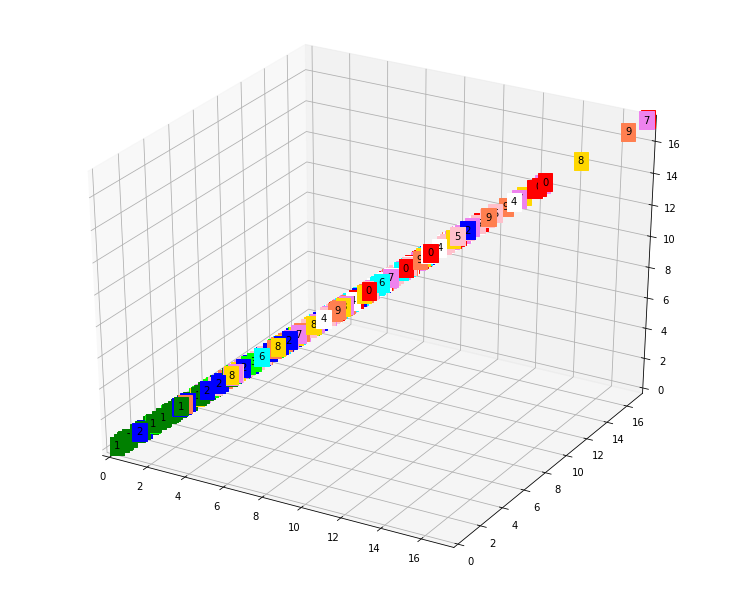

In [69]:
#데이터 시각화
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

fig = plt.figure(1)
ax = Axes3D(fig)

xs = encoded_imgs[:, 0] #3차원 피쳐들 중에 1차원 피쳐를 x축
ys = encoded_imgs[:, 0] #3차원 피쳐들 중에 2차원 피쳐를 y축
zs = encoded_imgs[:, 0] #3차원 피쳐들 중에 2차원 피쳐를 z축

color=['red','green','blue','lime','white','pink','aqua','violet','gold','coral']

for x, y, z, label in zip(xs, ys, zs, y_test):
    c = color[int(label)]
    ax.text(x, y, z, label, backgroundcolor=c)
    
ax.set_xlim(xs.min(), xs.max())
ax.set_ylim(ys.min(), ys.max())
ax.set_zlim(zs.min(), zs.max())

plt.show()


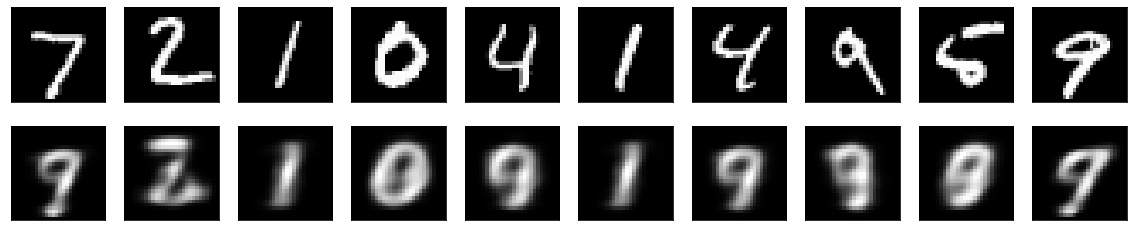

In [70]:
n = 10 # 보여줄 이미지 갯수
plt.figure(figsize=(20, 4))
for i in range(n):
  #display original
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #디코딩 된 이미지
  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()